# **Trained Models**

## Loading Merged Dataset

In [14]:
# Import necessary libraries
import pandas as pd

# Load the dataset
file_name = 'Master.csv'  # Replace with the actual path if necessary
data = pd.read_csv(file_name)

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(data.head())

# Display basic information about the dataset
print("\nDataset Info:")
print(data.info())

# Check for missing values
print("\nMissing Values Summary:")
print(data.isnull().sum())

# Display basic statistics for numerical columns
print("\nSummary Statistics:")
print(data.describe())


<ipython-input-14-eb8f9bff511e>:6: DtypeWarning: Columns (69,70,71) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_name)


First 5 rows of the dataset:
   resultId  raceId  driverId  constructorId_merged  number_x  grid  \
0         1      18         1                     1        22     1   
1         1      18         1                     1        22     1   
2         1      18         1                     1        22     1   
3         1      18         1                     1        22     1   
4         1      18         1                     1        22     1   

  position_merged positionText  positionOrder  points  ...  position_lap  \
0               1            1              1      10  ...           1.0   
1               1            1              1      10  ...           1.0   
2               1            1              1      10  ...           1.0   
3               1            1              1      10  ...           1.0   
4               1            1              1      10  ...           1.0   

  lap_time milliseconds qualifyId constructorId_qualifying number position  \
0  02:01.

### Exploring Datasets

In [15]:
data.shape

(180525, 72)


Sure! Data preprocessing and cleaning are essential steps to prepare your dataset for analysis and model training. I'll break this into a systematic step-by-step process to ensure your data is in optimal shape for the next phases of the project.

Step 1: Handling Missing Values
Objective: Identify and decide how to handle missing values (remove, fill, or ignore).

# Data Preprocessing/Cleaning

## Handling Missing Values

In [16]:
import numpy as np

columns_with_R = data.columns[data.isin(['R']).any()]
# print("\nColumns with 'R' values:", columns_with_R)

# Replace 'R' values with NaN for irrelevant columns
data.replace('R', np.nan, inplace=True)
# Replace "\N" with NaN (missing values)
data.replace("\\N", np.nan, inplace=True)

# Check the columns with NaN values
missing_values_after_replace = data.isnull().sum()
# print("\nMissing Values After Replacing '\\N':\n", missing_values_after_replace)

# Option 1: Drop columns with excessive missing values (threshold: >50% missing)
threshold = 0.5 * len(data)
data = data.dropna(axis=1, thresh=threshold)

# Option 2: Drop rows with too many missing values (if necessary)
data = data.dropna(axis=0, thresh=5)  # Adjust threshold as needed (e.g., keep rows with at least 5 non-NaN values)

# For remaining columns, fill missing values as appropriate
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())  # Fill numeric NaNs with column mean

categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])  # Fill categorical NaNs with mode

# Verify no missing or "\N" values remain
print("\nMissing Values After Cleaning:\n", data.isnull().sum())


<ipython-input-16-ece9887749f5>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace("\\N", np.nan, inplace=True)



Missing Values After Cleaning:
 resultId                    0
raceId                      0
driverId                    0
constructorId_merged        0
number_x                    0
grid                        0
position_merged             0
positionText                0
positionOrder               0
points                      0
laps                        0
fastestLap                  0
rank                        0
fastestLapTime              0
fastestLapSpeed             0
statusId                    0
driverRef                   0
code                        0
forename                    0
surname                     0
dob                         0
nationality_x               0
url_x_x                     0
constructorRef              0
name                        0
nationality_y               0
url_y_x                     0
year                        0
round                       0
circuitId                   0
name_x                      0
date                        0
url_x_y

## Handling Duplicate Values

In [17]:
# Check for duplicate rows
duplicate_rows = data.duplicated()
print("\nNumber of Duplicate Rows:", duplicate_rows.sum())

# Remove duplicates
data = data.drop_duplicates()

# Verify duplicates are removed
print("\nShape of Data After Removing Duplicates:", data.shape)



Number of Duplicate Rows: 0

Shape of Data After Removing Duplicates: (180525, 51)


### Again checked data

In [18]:
data.shape

(180525, 51)

## Handling Outliers

In [19]:
# Detect and handle outliers for numerical columns using IQR
Q1 = data[numeric_cols].quantile(0.25)
Q3 = data[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers (1.5 * IQR rule)
data = data[~((data[numeric_cols] < (Q1 - 1.5 * IQR)) | (data[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

print("\nShape of Data After Handling Outliers:", data.shape)



Shape of Data After Handling Outliers: (68978, 51)


### Handling categorical variables

In [20]:
# Convert columns to appropriate data types

# Ensure categorical variables are treated correctly
categorical_cols = ['driverRef', 'constructorRef', 'circuitRef', 'nationality_x', 'nationality_y']
data[categorical_cols] = data[categorical_cols].astype('category')

print("\nData Types After Conversion:\n", data.dtypes)



Data Types After Conversion:
 resultId                       int64
raceId                         int64
driverId                       int64
constructorId_merged           int64
number_x                       int64
grid                           int64
position_merged               object
positionText                  object
positionOrder                  int64
points                         int64
laps                           int64
fastestLap                    object
rank                          object
fastestLapTime                object
fastestLapSpeed               object
statusId                       int64
driverRef                   category
code                          object
forename                      object
surname                       object
dob                           object
nationality_x               category
url_x_x                       object
constructorRef              category
name                          object
nationality_y               category
url_y_x

### # Create new features (e.g., age from dob, race duration in seconds)


In [21]:

# Create new features (e.g., age from dob, race duration in seconds)
from datetime import datetime
current_year = datetime.now().year
data['age'] = current_year - pd.to_datetime(data['dob'], errors='coerce').dt.year



<ipython-input-21-fdecb881475e>:8: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['age'] = current_year - pd.to_datetime(data['dob'], errors='coerce').dt.year


### Checking data

In [22]:
data.shape

(68978, 52)

### Saving Cleaned Dataset

In [23]:
# Save the cleaned dataset
cleaned_file_name = 'Master_cleaned.csv'
data.to_csv(cleaned_file_name, index=False)
print("\nCleaned dataset saved as:", cleaned_file_name)



Cleaned dataset saved as: Master_cleaned.csv


## Loading Clean Dataset

In [24]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned dataset (replace the file path if needed)
data = pd.read_csv('Master_cleaned.csv')

# Basic Information
print("\nBasic Information of the Data:")
print(data.info())

# Descriptive Statistics
print("\nDescriptive Statistics:")
print(data.describe())

# Check missing values
print("\nMissing Values:")
print(data.isnull().sum())

<ipython-input-24-c058cf9b1335>:8: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Master_cleaned.csv')



Basic Information of the Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68978 entries, 0 to 68977
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   resultId                  68978 non-null  int64  
 1   raceId                    68978 non-null  int64  
 2   driverId                  68978 non-null  int64  
 3   constructorId_merged      68978 non-null  int64  
 4   number_x                  68978 non-null  int64  
 5   grid                      68978 non-null  int64  
 6   position_merged           68978 non-null  int64  
 7   positionText              68978 non-null  object 
 8   positionOrder             68978 non-null  int64  
 9   points                    68978 non-null  int64  
 10  laps                      68978 non-null  int64  
 11  fastestLap                68978 non-null  int64  
 12  rank                      68978 non-null  int64  
 13  fastestLapTime            689

# Exploratory Data Analysis(EDA)

## Distribution of numerical variables


<Figure size 1500x1000 with 0 Axes>

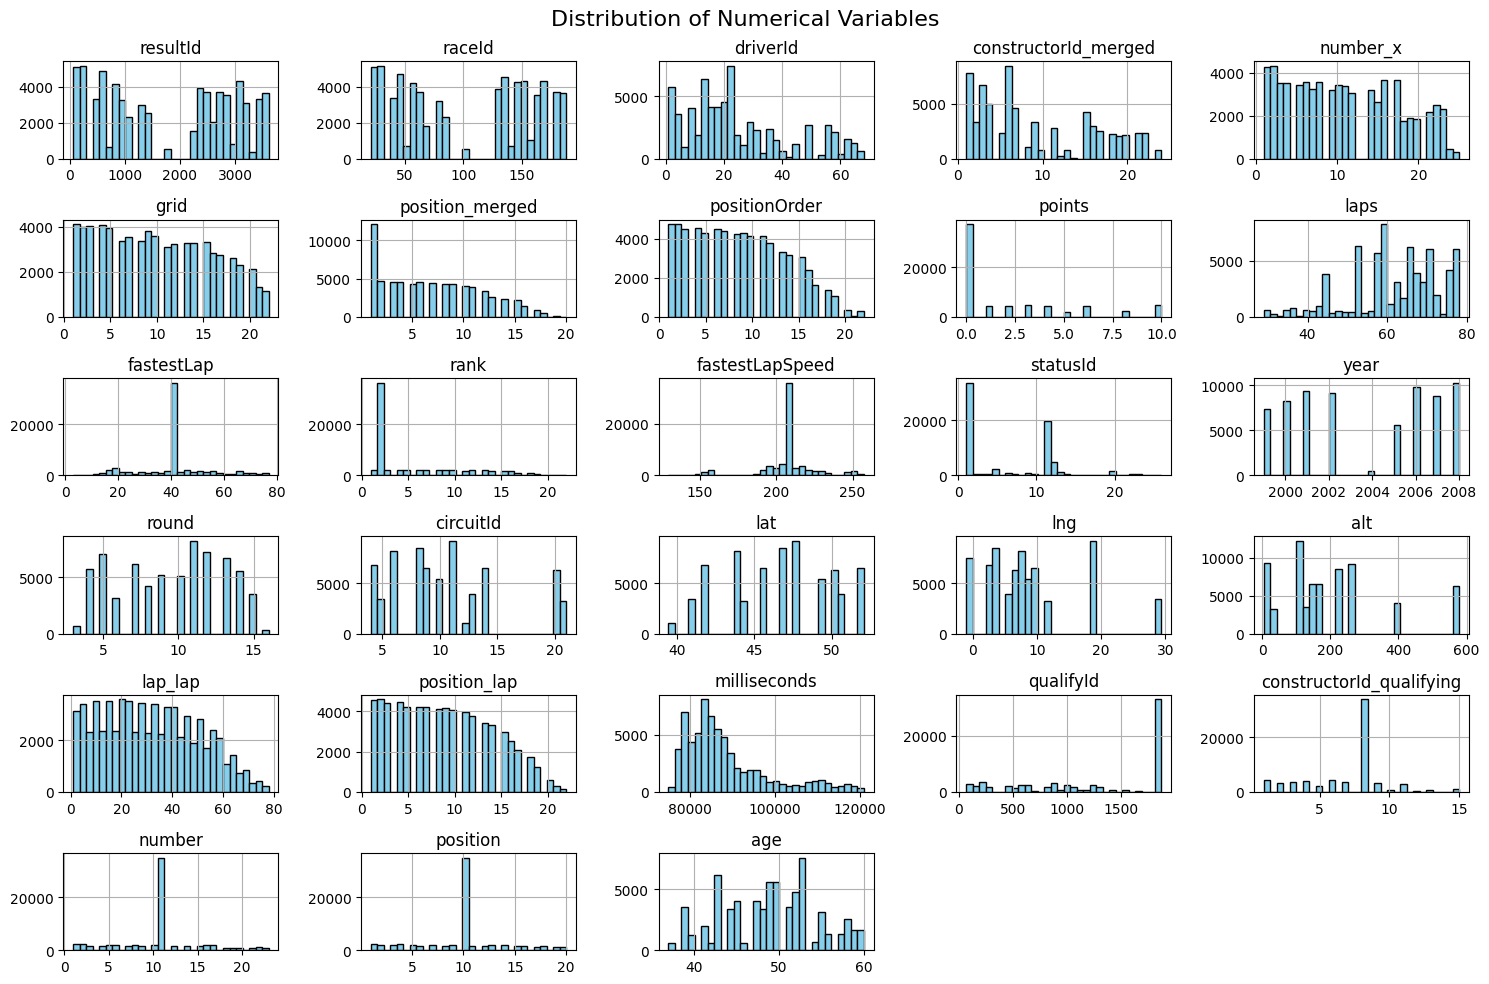

In [25]:
# 1. Distribution of numerical variables
numerical_columns = data.select_dtypes(include=[np.number]).columns

# Plotting histograms for numerical columns
plt.figure(figsize=(15, 10))
data[numerical_columns].hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Variables", fontsize=16)
plt.tight_layout()
plt.show()

## Correlation Heatmap

correlation matrix is
                           resultId    raceId  driverId  constructorId_merged  \
resultId                  1.000000  0.999926  0.587766              0.512289   
raceId                    0.999926  1.000000  0.586437              0.511107   
driverId                  0.587766  0.586437  1.000000              0.462242   
constructorId_merged      0.512289  0.511107  0.462242              1.000000   
number_x                  0.030478  0.028221  0.244075              0.454128   
grid                      0.046816  0.044233  0.263164              0.497969   
position_merged          -0.187028 -0.189479  0.005058              0.210729   
positionOrder            -0.059609 -0.063873  0.140123              0.353360   
points                   -0.084767 -0.082001 -0.179189             -0.432210   
laps                     -0.048949 -0.047245 -0.073695             -0.080090   
fastestLap               -0.064663 -0.064932  0.010011              0.011623   
rank             

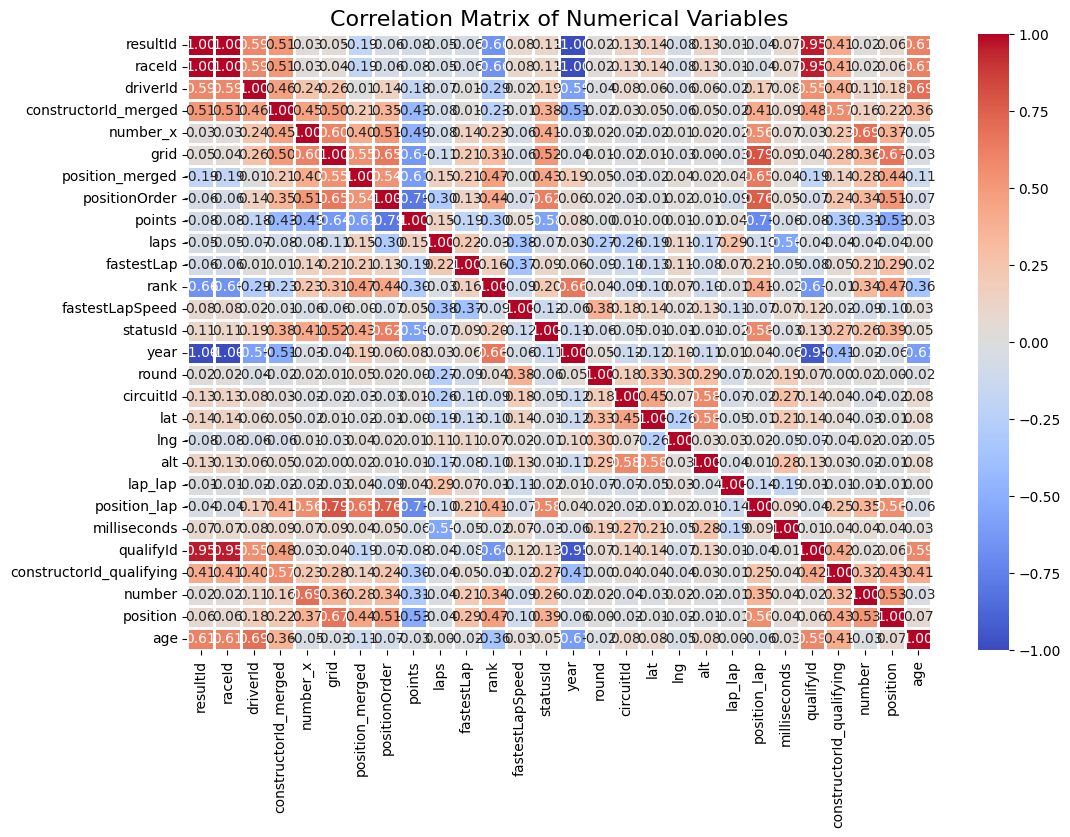

In [26]:
# 2. Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data[numerical_columns].corr()
print("correlation matrix is\n",correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, vmin=-1, vmax=1)
plt.title("Correlation Matrix of Numerical Variables", fontsize=16)
plt.show()

## # 3. Distribution of categorical variables (Driver Nationality, Constructor, etc.)


<ipython-input-27-d74e873f3029>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="Set2")


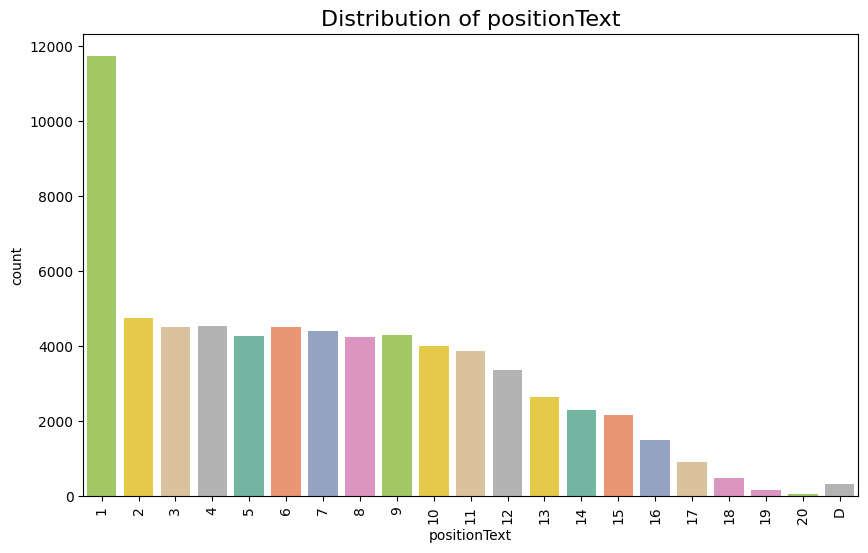

<ipython-input-27-d74e873f3029>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="Set2")


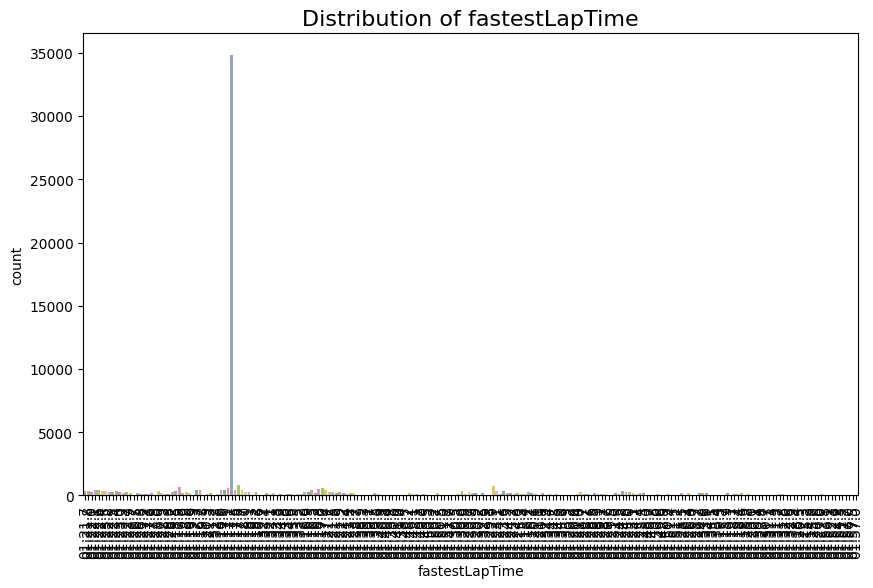

<ipython-input-27-d74e873f3029>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="Set2")


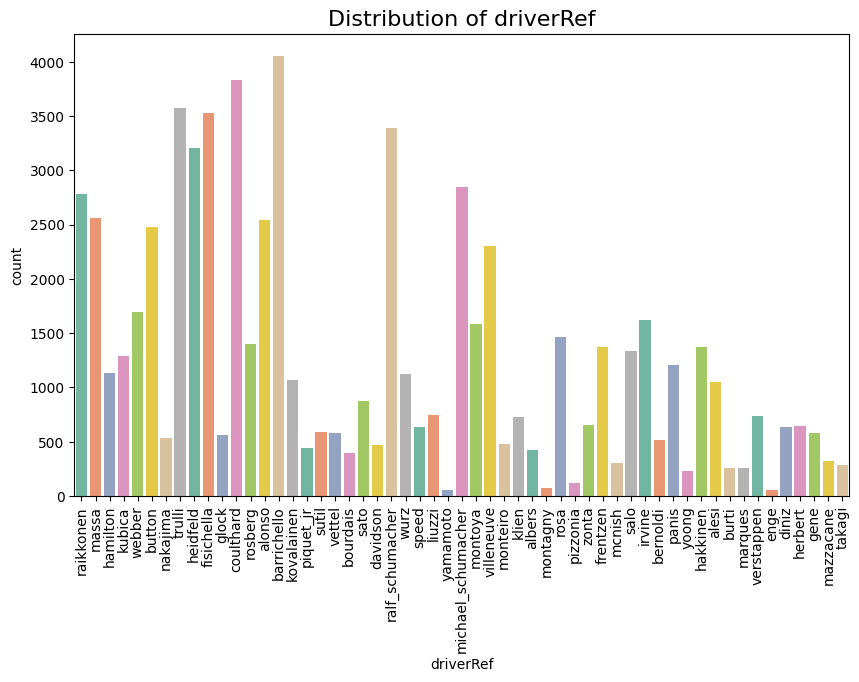

<ipython-input-27-d74e873f3029>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="Set2")


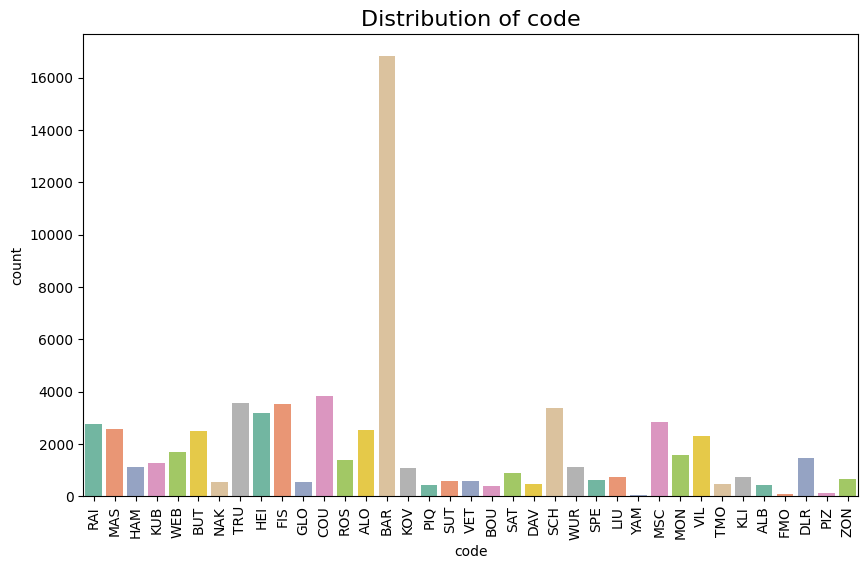

<ipython-input-27-d74e873f3029>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="Set2")


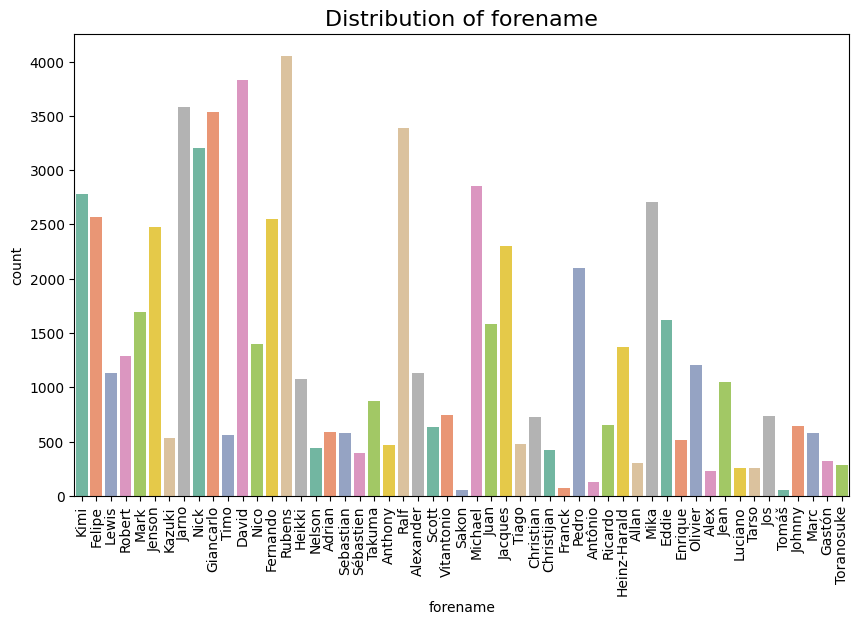

<ipython-input-27-d74e873f3029>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="Set2")


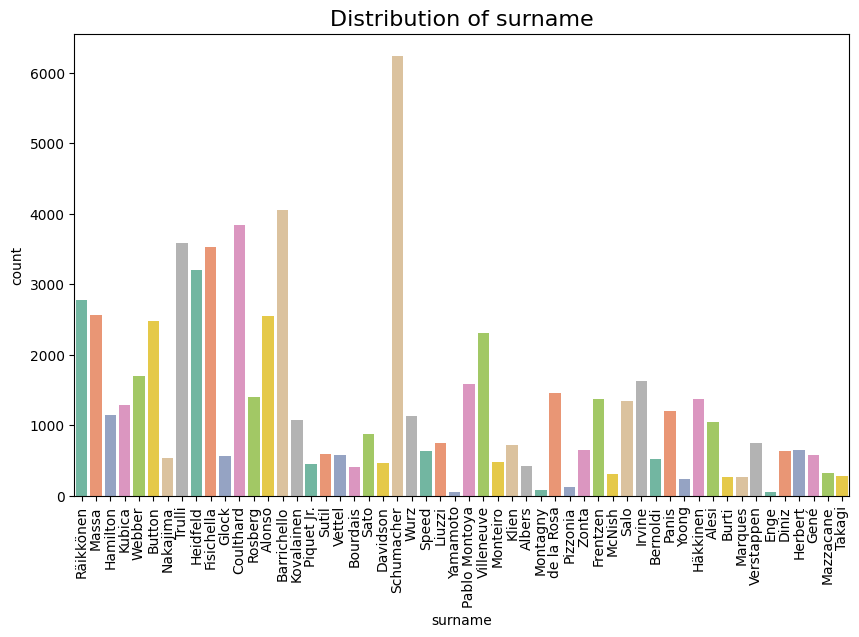

<ipython-input-27-d74e873f3029>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="Set2")


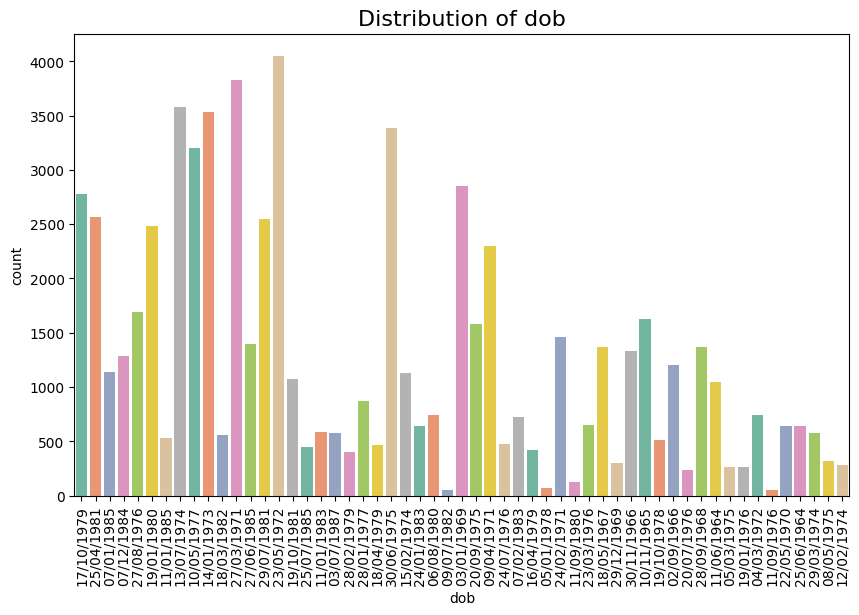

<ipython-input-27-d74e873f3029>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="Set2")


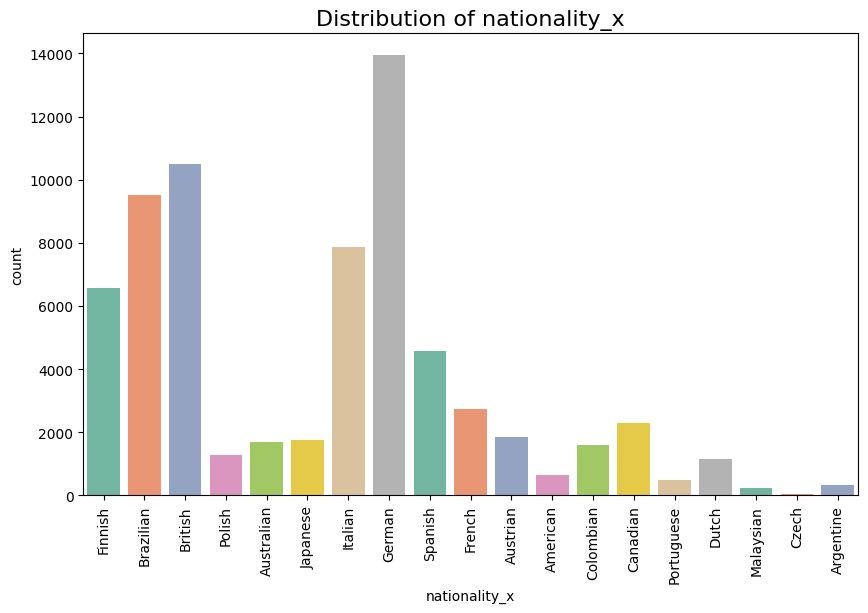

<ipython-input-27-d74e873f3029>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="Set2")


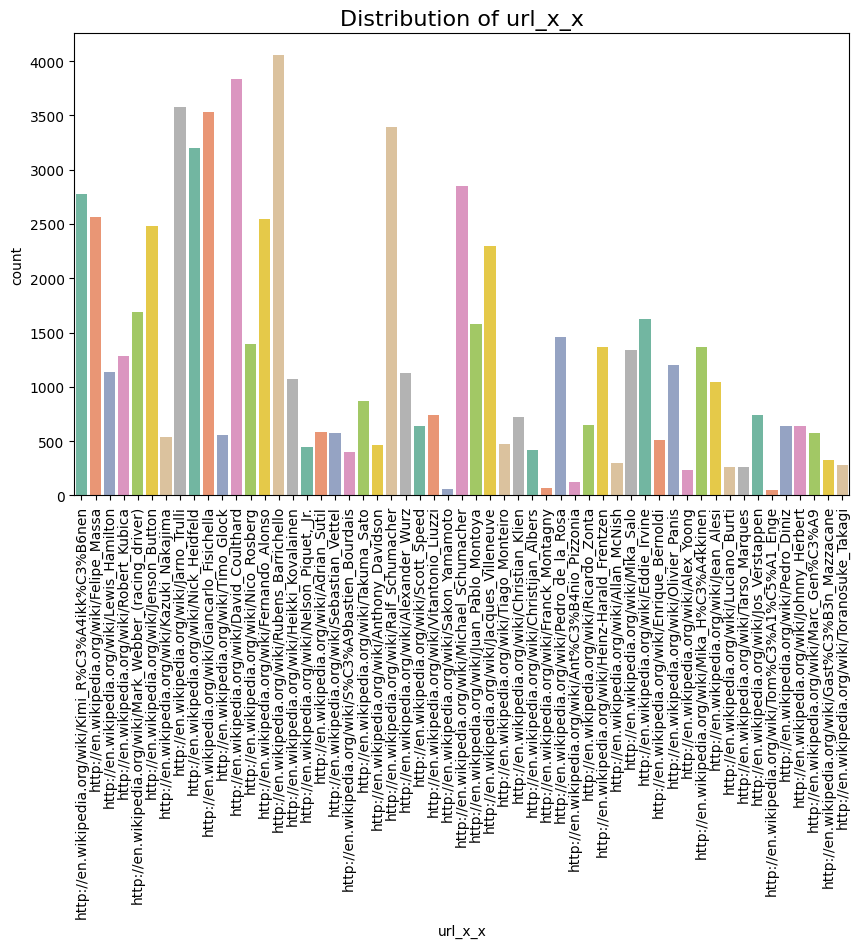

<ipython-input-27-d74e873f3029>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="Set2")


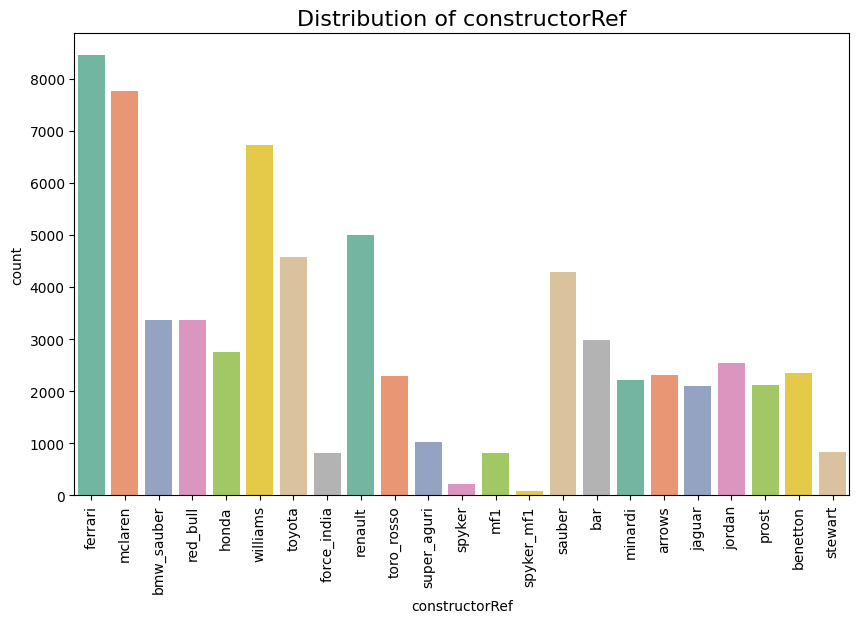

<ipython-input-27-d74e873f3029>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="Set2")


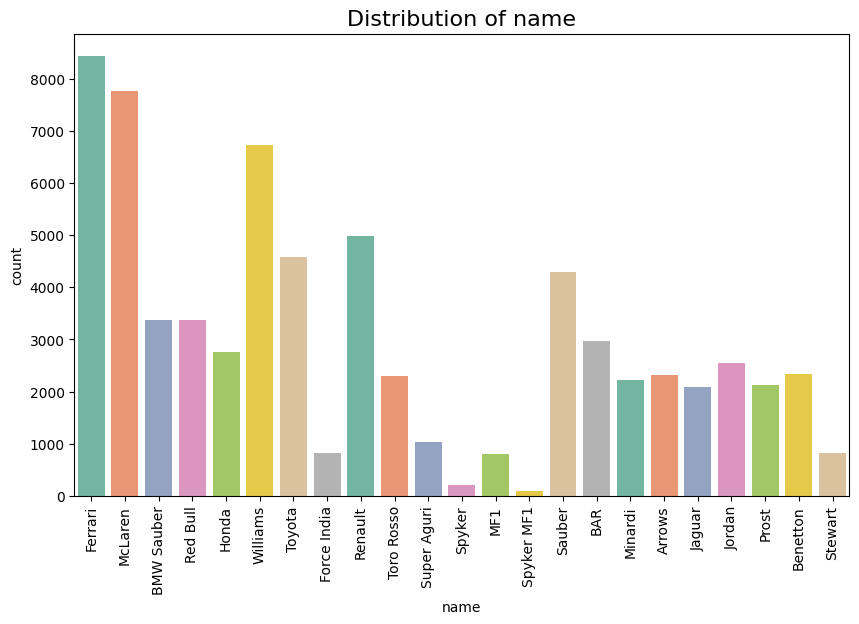

<ipython-input-27-d74e873f3029>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="Set2")


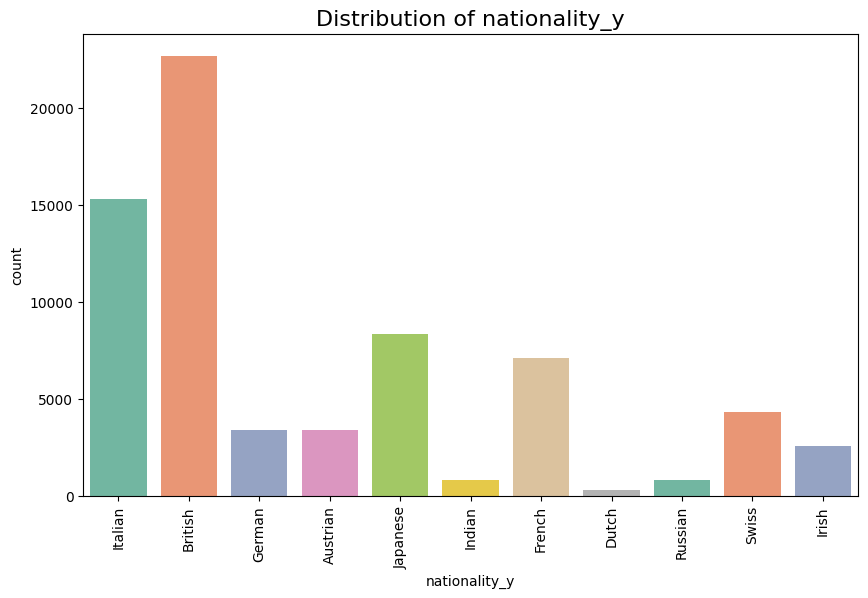

<ipython-input-27-d74e873f3029>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="Set2")


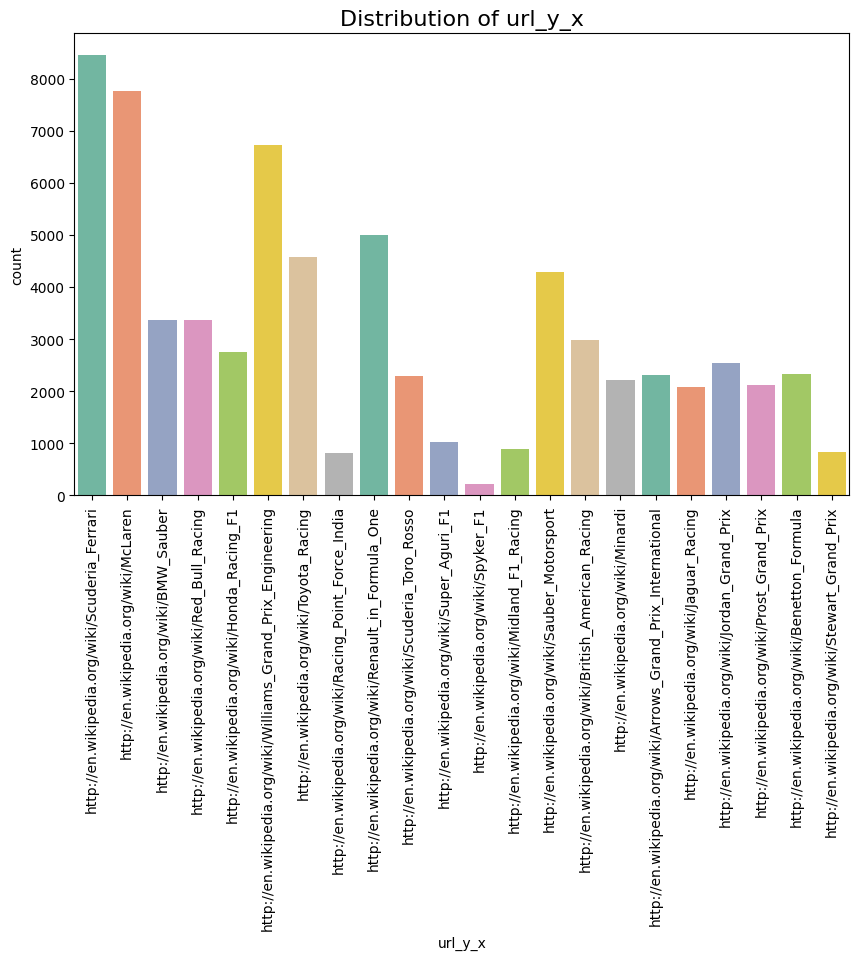

<ipython-input-27-d74e873f3029>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="Set2")


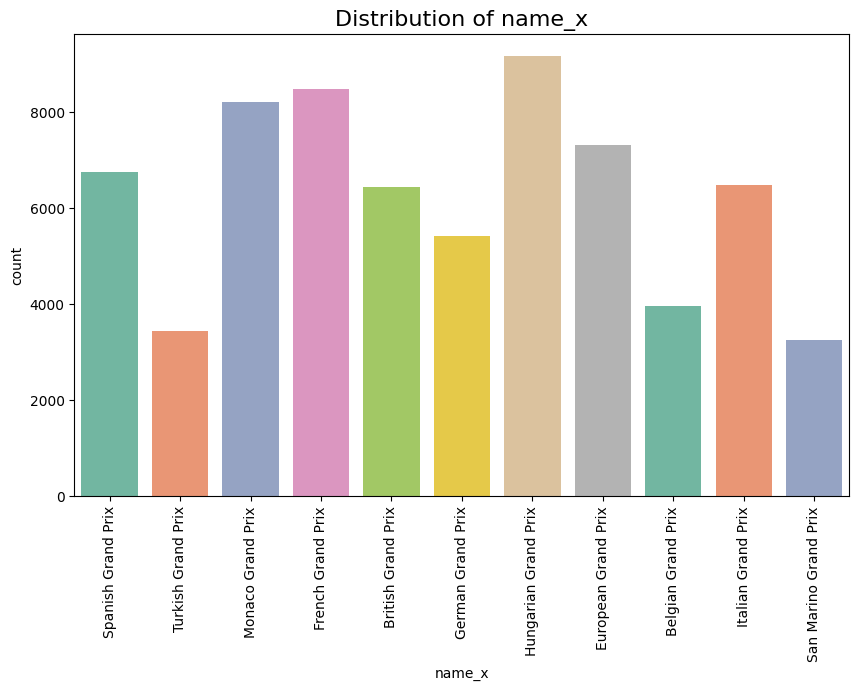

<ipython-input-27-d74e873f3029>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="Set2")


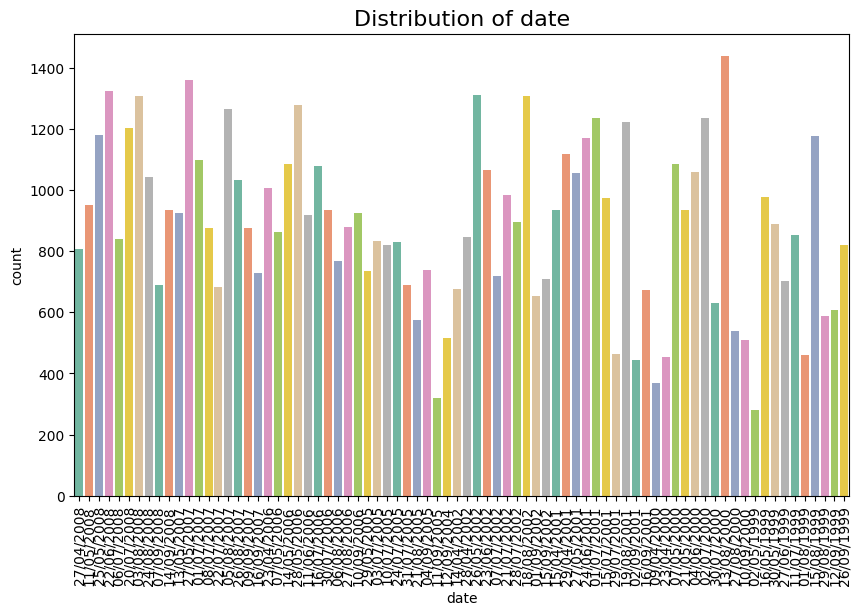

<ipython-input-27-d74e873f3029>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="Set2")


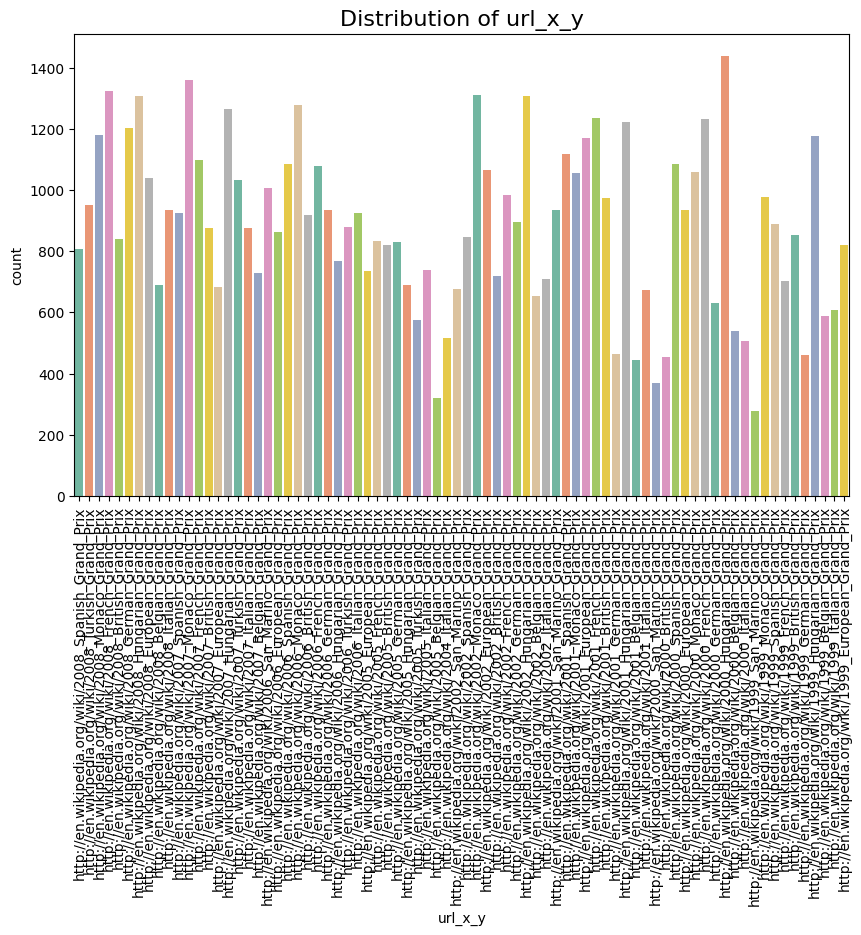

<ipython-input-27-d74e873f3029>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="Set2")


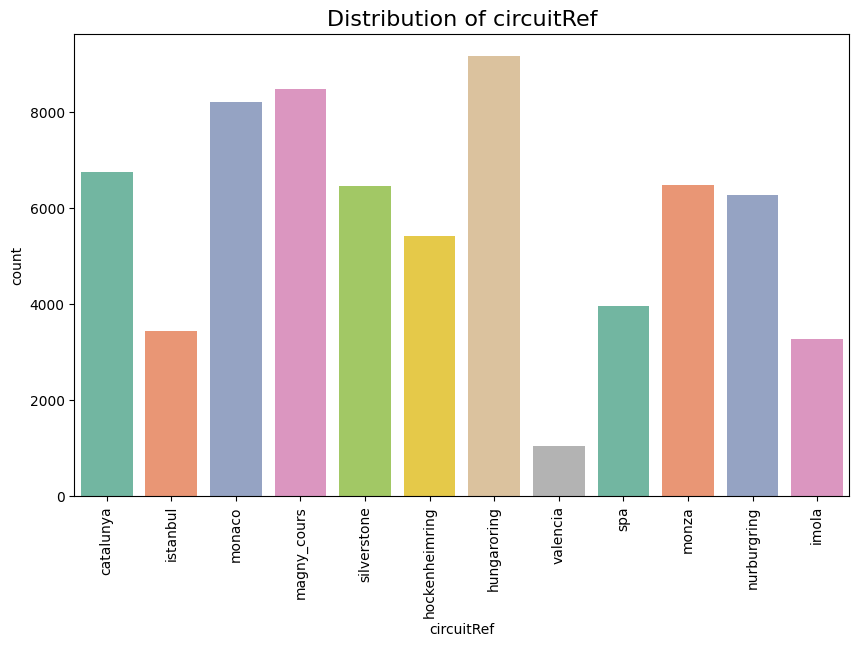

<ipython-input-27-d74e873f3029>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="Set2")


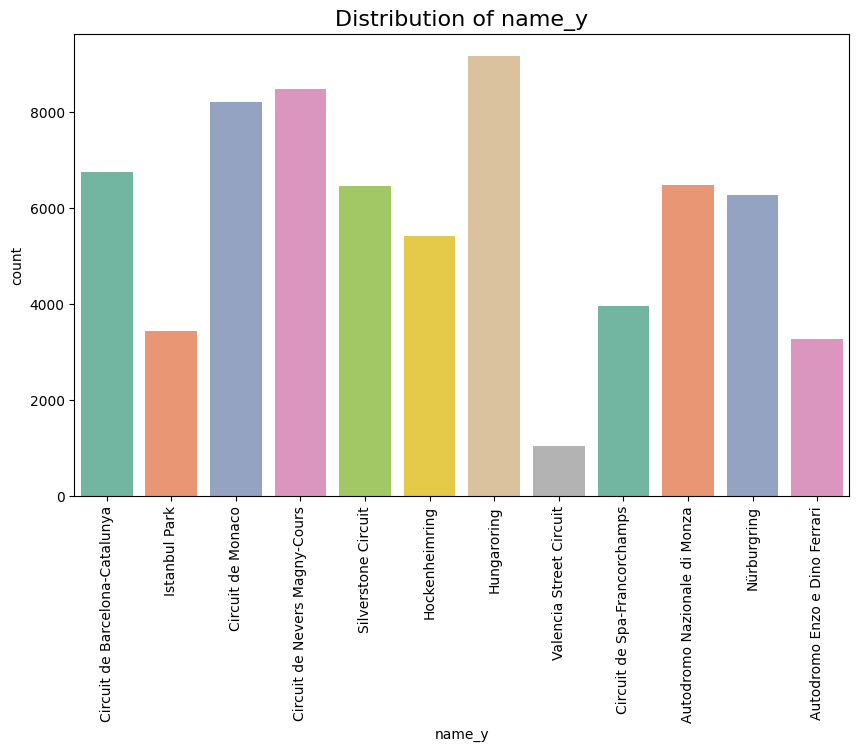

<ipython-input-27-d74e873f3029>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="Set2")


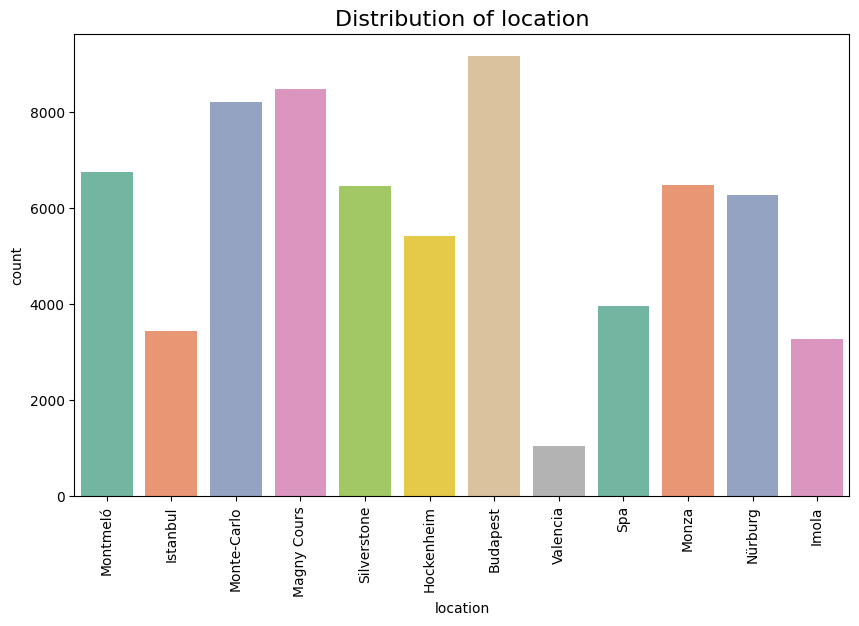

<ipython-input-27-d74e873f3029>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="Set2")


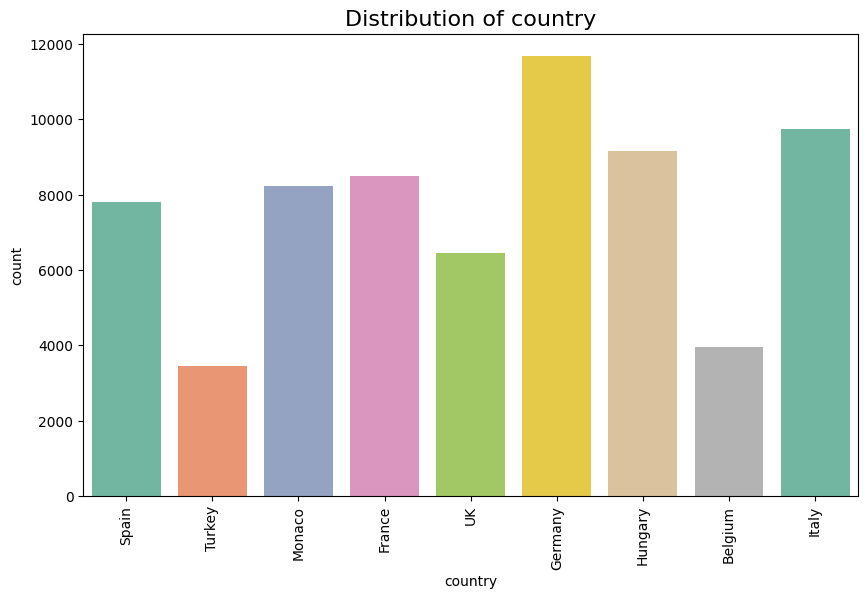

<ipython-input-27-d74e873f3029>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="Set2")


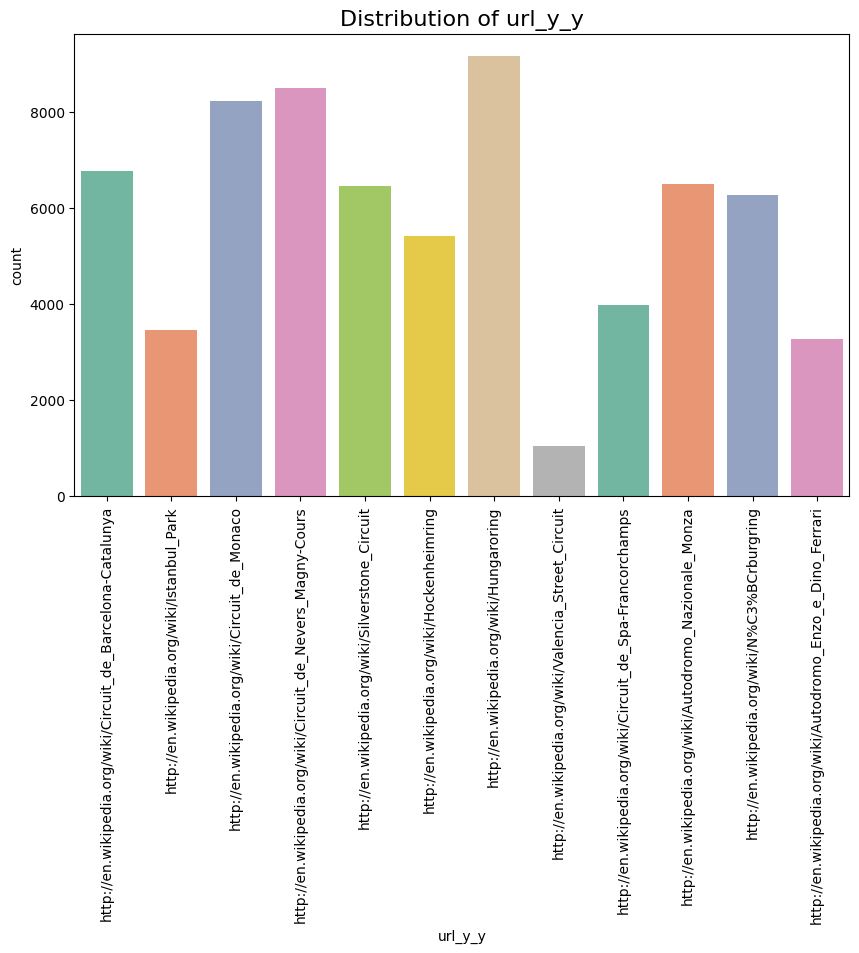

<ipython-input-27-d74e873f3029>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="Set2")


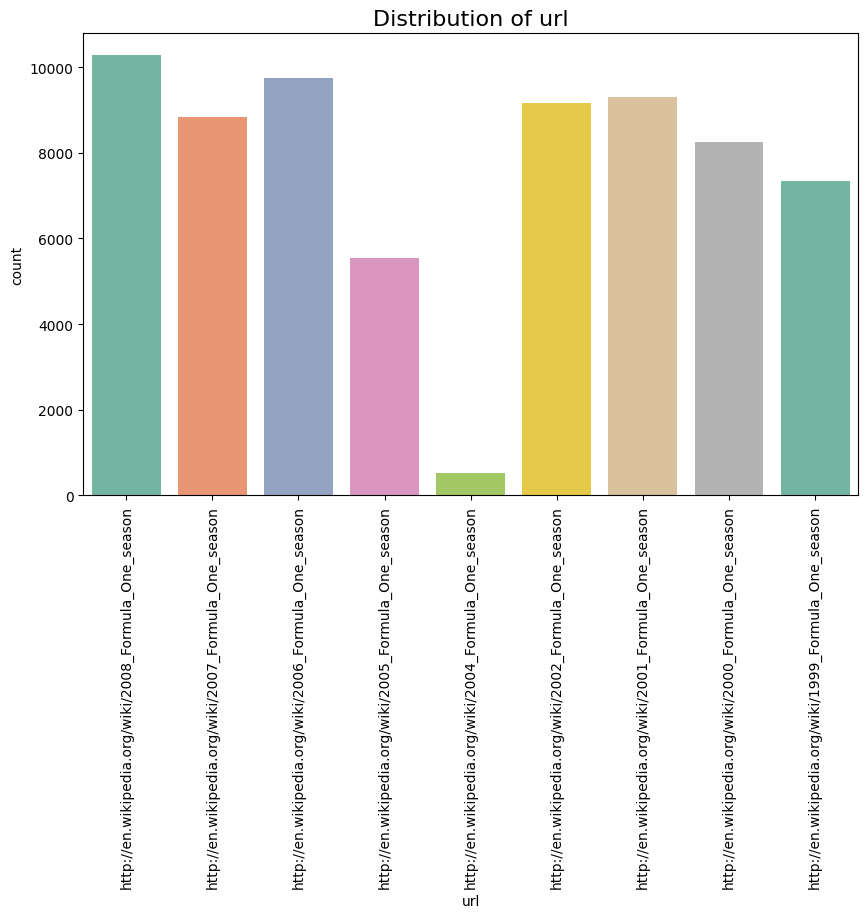

<ipython-input-27-d74e873f3029>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="Set2")


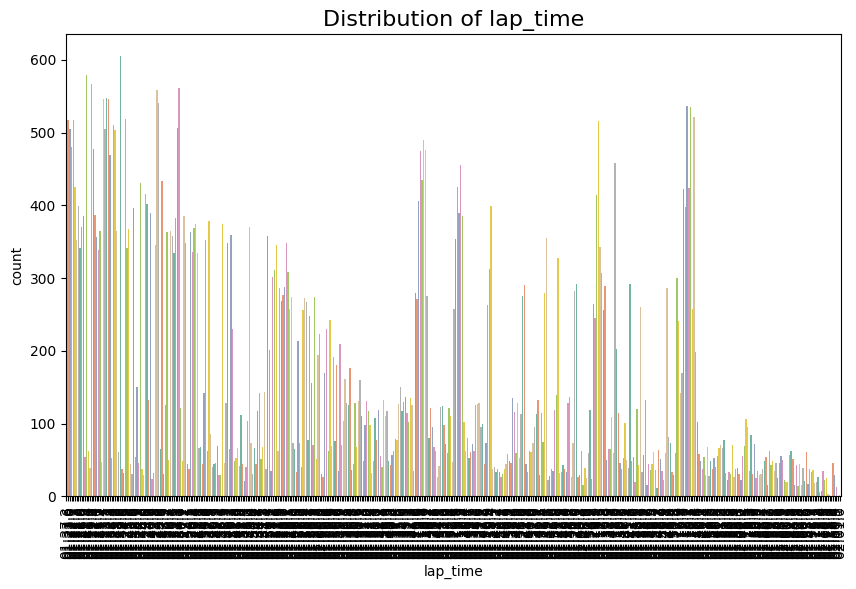

<ipython-input-27-d74e873f3029>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="Set2")


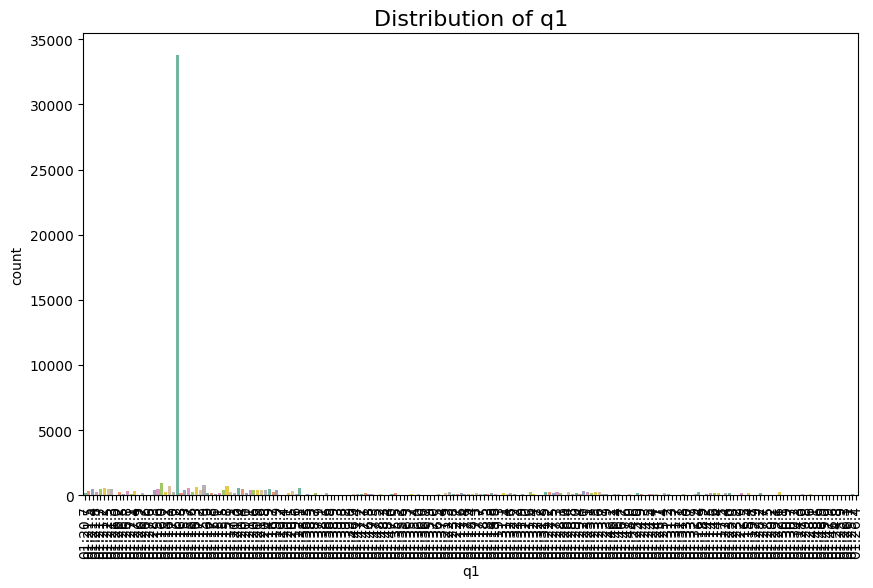

In [27]:
# 3. Distribution of categorical variables (Driver Nationality, Constructor, etc.)
categorical_columns = data.select_dtypes(include=[object]).columns

# Plotting bar charts for categorical columns
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=col, palette="Set2")
    plt.title(f"Distribution of {col}", fontsize=16)
    plt.xticks(rotation=90)
    plt.show()

## Scatter plot: Relationship between 'laps' and 'points'

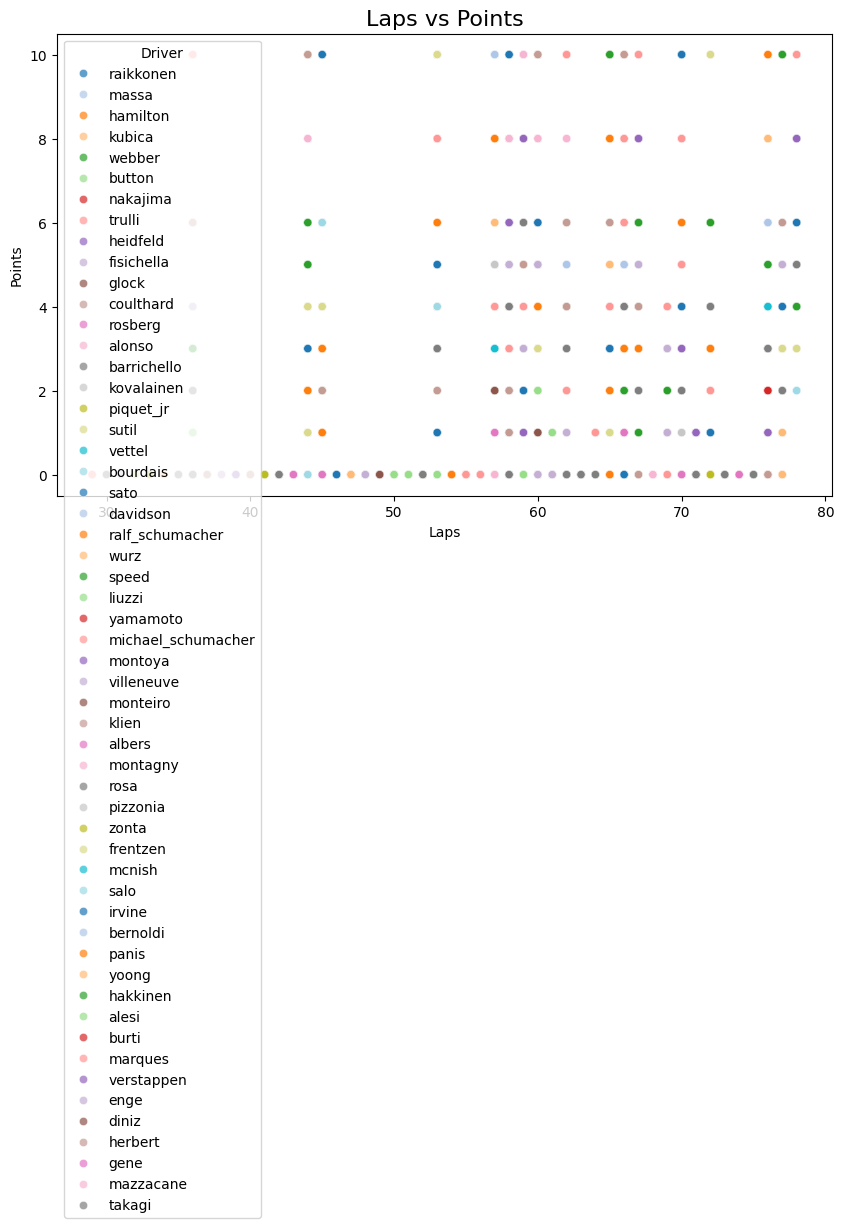

In [28]:
# 4. Scatter plot: Relationship between 'laps' and 'points'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='laps', y='points', hue='driverRef', palette='tab20', alpha=0.7)
plt.title("Laps vs Points", fontsize=16)
plt.xlabel("Laps")
plt.ylabel("Points")
plt.legend(title="Driver")
plt.show()


### Boxplot of 'points' by 'rank' (Position)

<ipython-input-29-572bdcb920d8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='rank', y='points', palette='Set3')


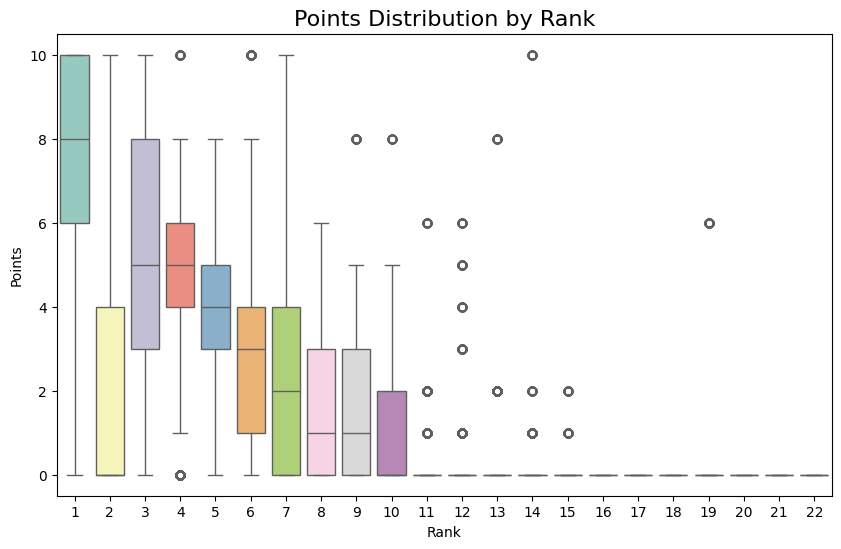

In [29]:

# 5. Boxplot of 'points' by 'rank' (Position)
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='rank', y='points', palette='Set3')
plt.title("Points Distribution by Rank", fontsize=16)
plt.xlabel("Rank")
plt.ylabel("Points")
plt.show()

## Scatter plot: 'fastestLap' vs 'rank'

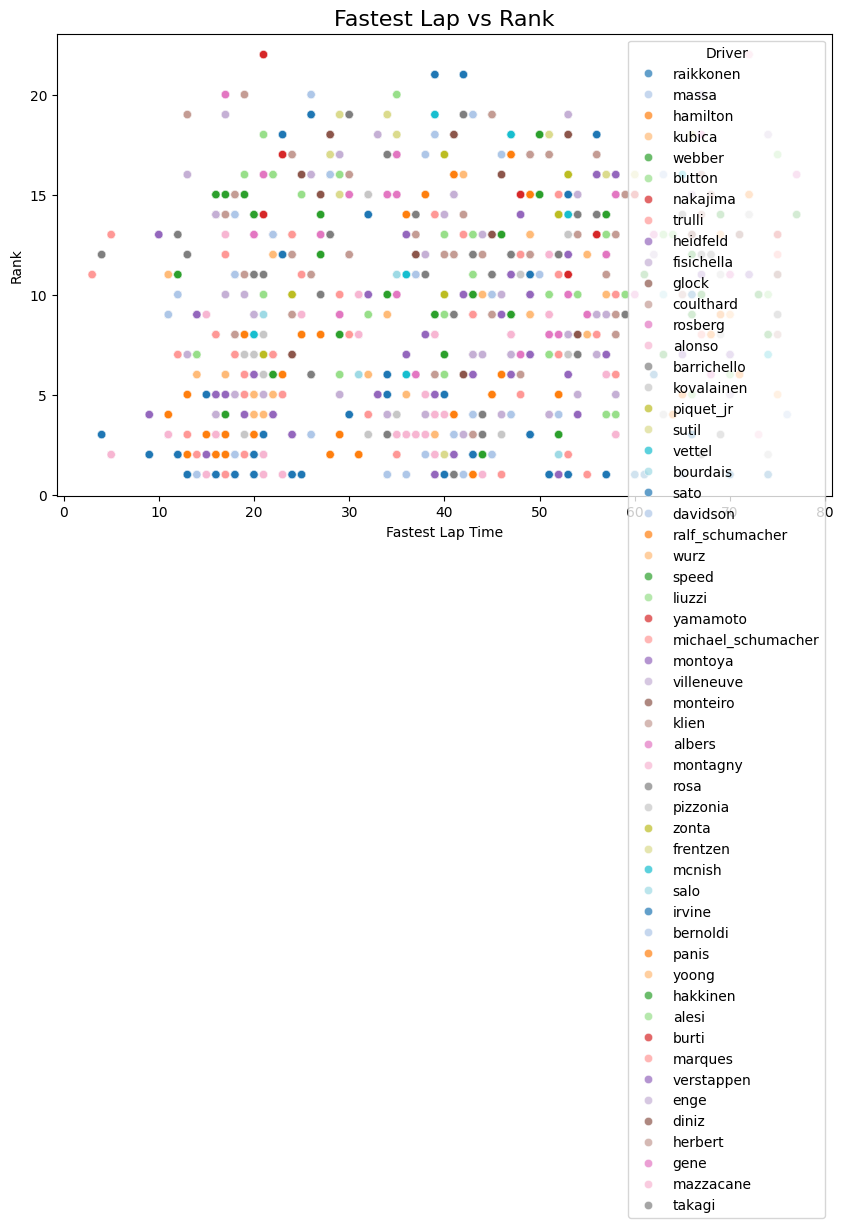

In [30]:
# 6. Scatter plot: 'fastestLap' vs 'rank'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='fastestLap', y='rank', hue='driverRef', palette='tab20', alpha=0.7)
plt.title("Fastest Lap vs Rank", fontsize=16)
plt.xlabel("Fastest Lap Time")
plt.ylabel("Rank")
plt.legend(title="Driver")
plt.show()

##  Age vs Points

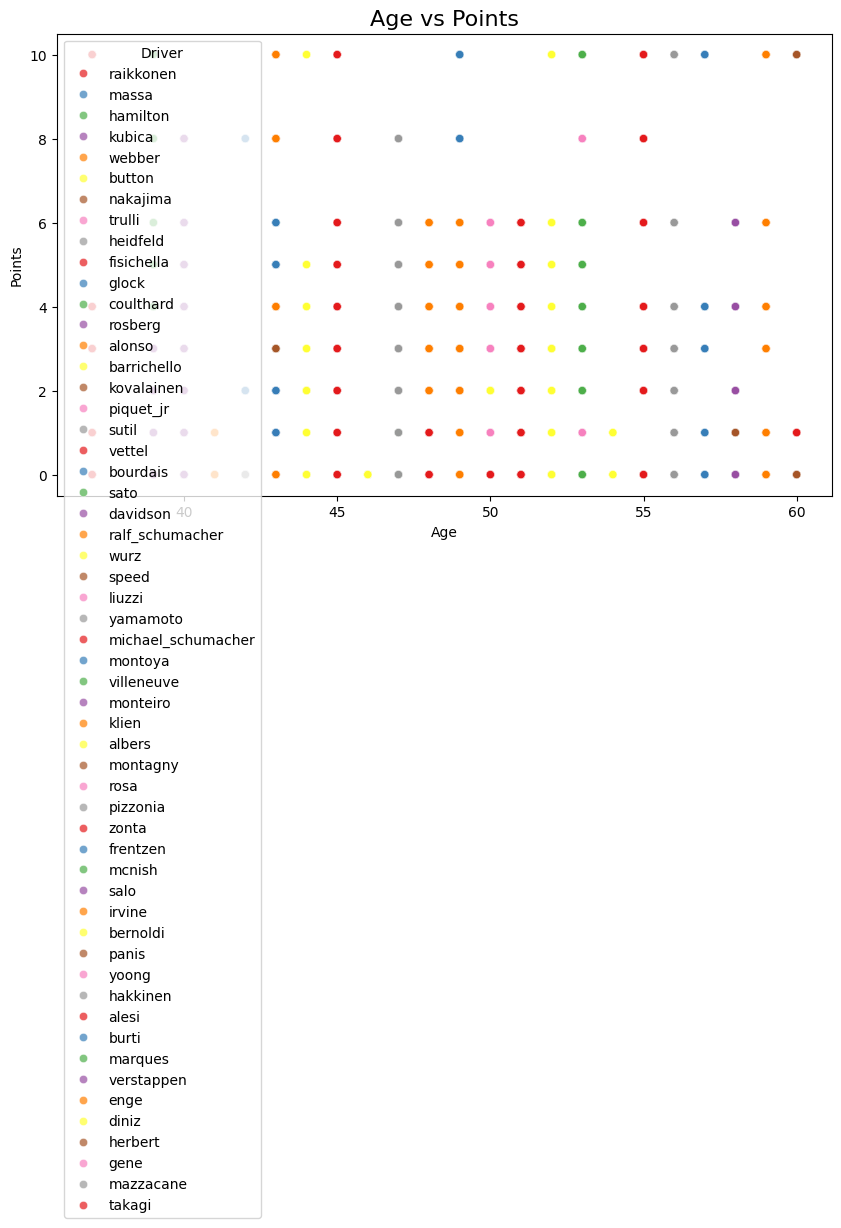

In [33]:
# 8. Age vs Points (Age might have an impact on performance)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='age', y='points', hue='driverRef', palette='Set1', alpha=0.7)
plt.title("Age vs Points", fontsize=16)
plt.xlabel("Age")
plt.ylabel("Points")
plt.legend(title="Driver")
plt.show()

Boxplot for Top 10 Features And Correlation Matrix for Highly Correlated Features:



## Create a boxplot and Heatmap for some relevant features

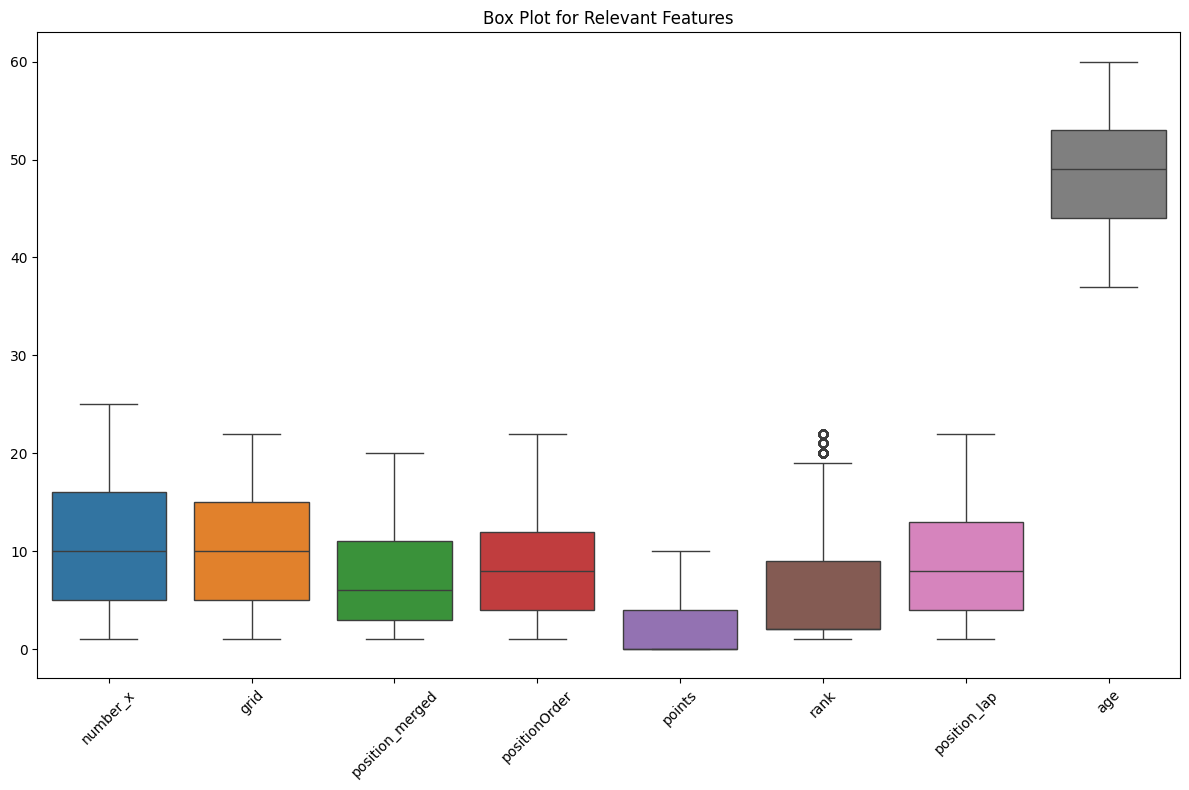

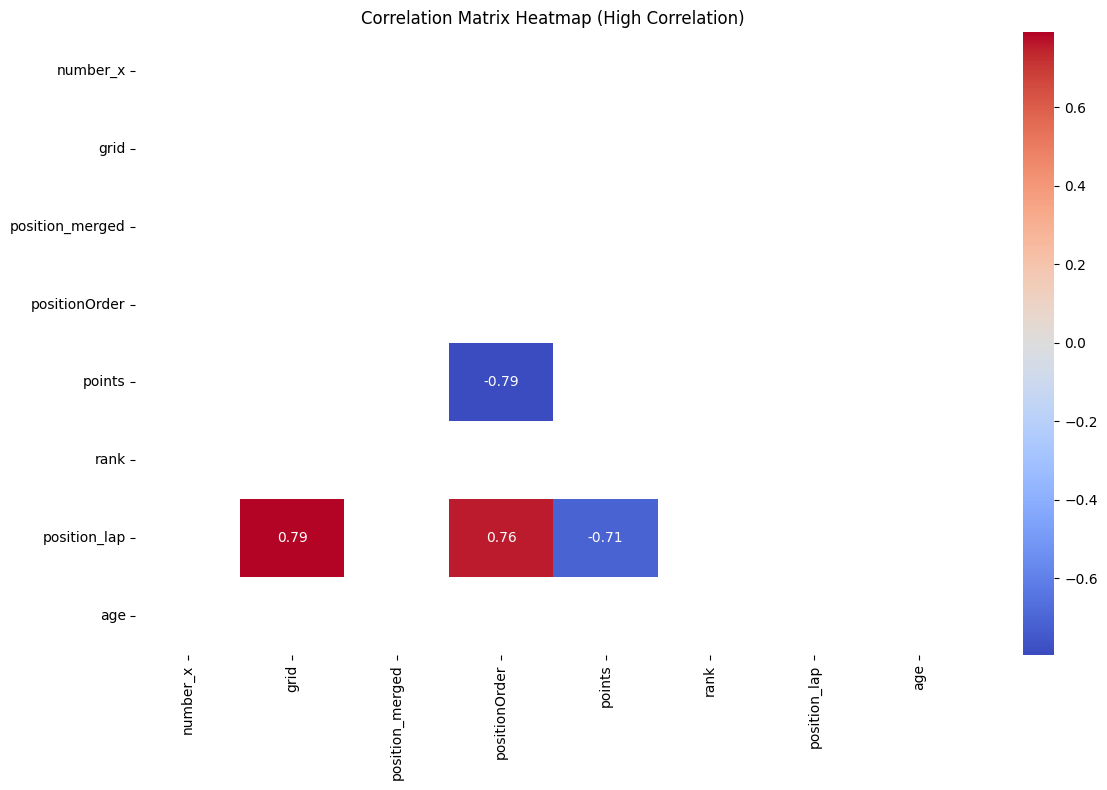

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select relevant features, excluding identifiers
relevant_features = ['number_x', 'grid', 'position_merged', 'positionOrder', 'points',
                     'rank', 'position_lap', 'age']

# Create a boxplot for these relevant features
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[relevant_features])
plt.title('Box Plot for Relevant Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting correlation matrix heatmap for highly correlated features
corr_matrix = data[relevant_features].corr()

# Get the pairs of features with high correlation (absolute value > 0.7)
high_corr = corr_matrix[abs(corr_matrix) > 0.7]

# Masking the upper triangle of the correlation matrix (optional)
mask = np.triu(np.ones_like(high_corr, dtype=bool))

# Plot the heatmap for highly correlated features
plt.figure(figsize=(12, 8))
sns.heatmap(high_corr, annot=True, cmap='coolwarm', mask=mask, fmt=".2f")
plt.title('Correlation Matrix Heatmap (High Correlation)')
plt.tight_layout()
plt.show()


# Model Training

## Training of Support Vector Classification (SVC)

[17  2  3 ... 18  1  2]


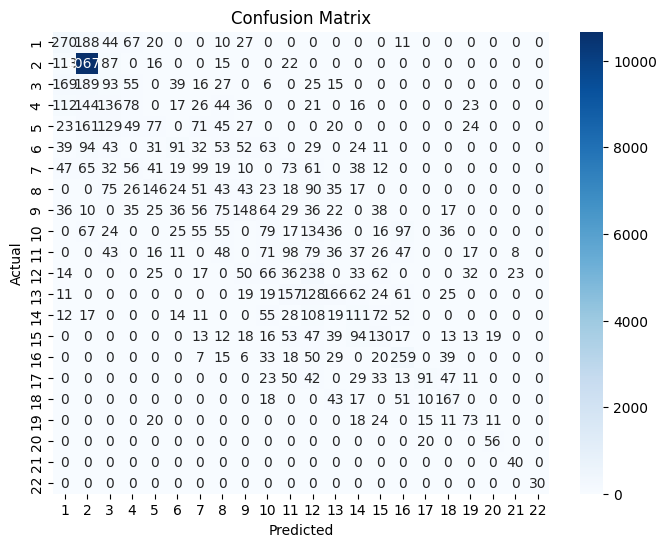

Classification Report:
              precision    recall  f1-score   support

           1       0.32      0.42      0.36       637
           2       0.92      0.98      0.95     10924
           3       0.13      0.15      0.14       634
           4       0.21      0.12      0.15       653
           5       0.18      0.12      0.15       626
           6       0.33      0.16      0.22       562
           7       0.22      0.17      0.19       572
           8       0.09      0.07      0.08       591
           9       0.34      0.24      0.28       627
          10       0.15      0.12      0.13       641
          11       0.16      0.18      0.17       537
          12       0.22      0.40      0.28       596
          13       0.36      0.25      0.29       672
          14       0.22      0.22      0.22       499
          15       0.28      0.27      0.27       484
          16       0.43      0.54      0.48       476
          17       0.67      0.27      0.38       339
    

In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your cleaned dataframe is named df and target variable is 'rank'

# Step 1: Selecting relevant features and target variable
features = ['driverId', 'constructorId_merged', 'grid', 'points', 'fastestLap',
            'fastestLapTime', 'fastestLapSpeed', 'statusId', 'time_x',
            'age', 'constructorRef', 'circuitId', 'location', 'country', 'year', 'round',
            'qualifyId', 'q1', 'q2']
target = 'rank'  # Target column: the position or rank of the driver in the race

# Preprocess the fastestLapTime column
def convert_lap_time(time_str):
    if pd.isna(time_str):
        return np.nan
    try:
        # Split the time string into minutes and seconds
        minutes, seconds = map(float, time_str.split(':'))
        # Convert to total seconds
        return minutes * 60 + seconds
    except:
        return np.nan

# Apply the conversion
data['fastestLapTime_numeric'] = data['fastestLapTime'].apply(convert_lap_time)

# Update features list
features =['grid', 'points', 'fastestLap','laps',
            'fastestLapTime_numeric', 'fastestLapSpeed','round', 'lat','lng','alt',
            'age', 'location', 'country', 'year']

# Step 2: Split the data into features (X) and target (y)
X = data[features]
y = data[target]

# Handle any remaining non-numeric columns or NaN values
X = X.select_dtypes(include=[np.number])
X = X.fillna(X.mean())

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Scaling the data (important for SVC)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Initialize and train the SVC model
svc_model = SVC(kernel='linear', random_state=42, probability=True)  # Using linear kernel
svc_model.fit(X_train_scaled, y_train)

# Step 6: Make predictions
y_pred = svc_model.predict(X_test_scaled)
print(y_pred)
# Step 7: Model Evaluation

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))



## Training of Logistic Regression (LR)

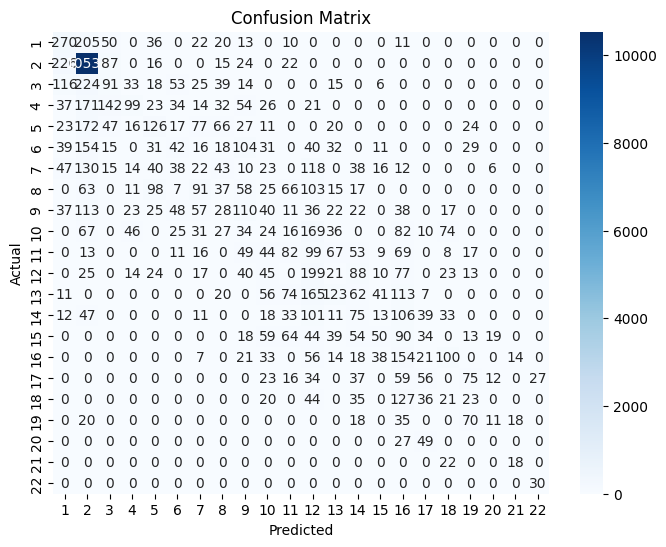

Classification Report:
              precision    recall  f1-score   support

           1       0.33      0.42      0.37       637
           2       0.88      0.96      0.92     10924
           3       0.20      0.14      0.17       634
           4       0.39      0.15      0.22       653
           5       0.29      0.20      0.24       626
           6       0.15      0.07      0.10       562
           7       0.05      0.04      0.04       572
           8       0.11      0.06      0.08       591
           9       0.19      0.18      0.18       627
          10       0.05      0.04      0.04       641
          11       0.21      0.15      0.18       537
          12       0.16      0.33      0.22       596
          13       0.30      0.18      0.23       672
          14       0.15      0.15      0.15       499
          15       0.26      0.10      0.15       484
          16       0.15      0.32      0.21       476
          17       0.22      0.17      0.19       339
    

In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your cleaned dataframe is named df and target variable is 'rank'

# Step 1: Selecting relevant features and target variable
features = ['driverId', 'constructorId_merged', 'grid', 'points', 'fastestLap',
            'fastestLapTime', 'fastestLapSpeed', 'statusId', 'time_x',
            'age', 'constructorRef', 'circuitId', 'location', 'country', 'year', 'round',
            'qualifyId', 'q1', 'q2']
target = 'rank'  # Target column: the position or rank of the driver in the race

# Preprocess the fastestLapTime column
def convert_lap_time(time_str):
    if pd.isna(time_str):
        return np.nan
    try:
        # Split the time string into minutes and seconds
        minutes, seconds = map(float, time_str.split(':'))
        # Convert to total seconds
        return minutes * 60 + seconds
    except:
        return np.nan

# Apply the conversion
data['fastestLapTime_numeric'] = data['fastestLapTime'].apply(convert_lap_time)

# Update features list
features =['grid', 'points', 'fastestLap','laps',
            'fastestLapTime_numeric', 'fastestLapSpeed','round', 'lat','lng','alt',
            'age', 'location', 'country', 'year']

# Step 2: Split the data into features (X) and target (y)
X = data[features]
y = data[target]

# Handle any remaining non-numeric columns or NaN values
X = X.select_dtypes(include=[np.number])
X = X.fillna(X.mean())

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Scaling the data (important for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Initialize and train the Logistic Regression model
logreg_model = LogisticRegression(random_state=42, max_iter=1000)  # Using default solver
logreg_model.fit(X_train_scaled, y_train)

# Step 6: Make predictions
y_pred = logreg_model.predict(X_test_scaled)

# Step 7: Model Evaluation

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))




## Comparsion of Classification report of Logistic Regression and Support Vector Classification

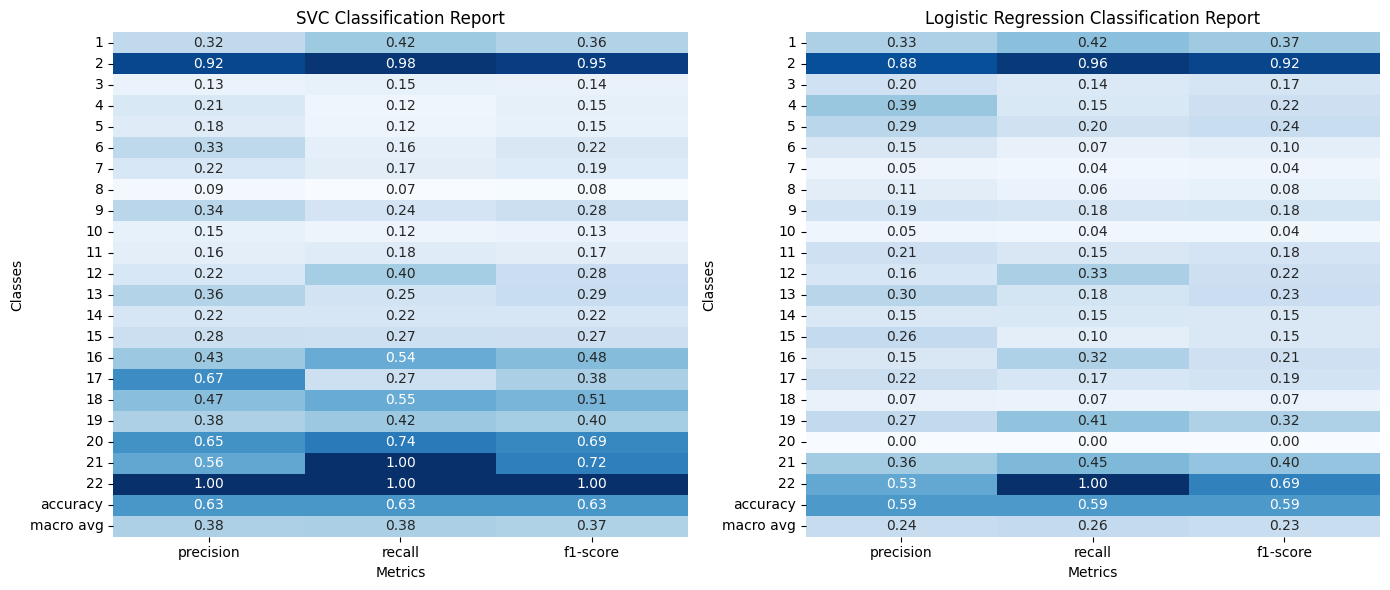

SVC Classification Report:
              precision    recall  f1-score      support
1              0.319149  0.423862  0.364127    637.00000
2              0.919438  0.976840  0.947270  10924.00000
3              0.131728  0.146688  0.138806    634.00000
4              0.213115  0.119449  0.153091    653.00000
5              0.184652  0.123003  0.147651    626.00000
6              0.329710  0.161922  0.217184    562.00000
7              0.218062  0.173077  0.192982    572.00000
8              0.093275  0.072758  0.081749    591.00000
9              0.339450  0.236045  0.278457    627.00000
10             0.147388  0.123245  0.134240    641.00000
11             0.163606  0.182495  0.172535    537.00000
12             0.218750  0.399329  0.282660    596.00000
13             0.360870  0.247024  0.293286    672.00000
14             0.223790  0.222445  0.223116    499.00000
15             0.277778  0.268595  0.273109    484.00000
16             0.425987  0.544118  0.477860    476.00000
17  

In [46]:
# Step 7: Make predictions for both models
y_pred_svc = svc_model.predict(X_test_scaled)
y_pred_logreg = logreg_model.predict(X_test_scaled)
# Step 8: Generate classification reports for both models
report_svc = classification_report(y_test, y_pred_svc, output_dict=True)
report_logreg = classification_report(y_test, y_pred_logreg, output_dict=True)

# Step 9: Convert classification reports to dataframes for easier comparison
report_svc_df = pd.DataFrame(report_svc).transpose()
report_logreg_df = pd.DataFrame(report_logreg).transpose()

# Step 10: Plotting the comparison of classification reports
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for SVC
sns.heatmap(report_svc_df.iloc[:-1, :-1], annot=True, fmt='.2f', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title('SVC Classification Report')
axes[0].set_xlabel('Metrics')
axes[0].set_ylabel('Classes')

# Plot for Logistic Regression
sns.heatmap(report_logreg_df.iloc[:-1, :-1], annot=True, fmt='.2f', cmap='Blues', cbar=False, ax=axes[1])
axes[1].set_title('Logistic Regression Classification Report')
axes[1].set_xlabel('Metrics')
axes[1].set_ylabel('Classes')

plt.tight_layout()
plt.show()

# Print the classification reports
print("SVC Classification Report:")
print(report_svc_df)
print("\nLogistic Regression Classification Report:")
print(report_logreg_df)

## Training a Convolutional Neural Network (CNN)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1509/1509 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.5456 - loss: 1.5910 - val_accuracy: 0.6479 - val_loss: 1.0830
Epoch 2/30
1509/1509 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6209 - loss: 1.1155 - val_accuracy: 0.7135 - val_loss: 0.8538
Epoch 3/30
1509/1509 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6703 - loss: 0.9489 - val_accuracy: 0.7833 - val_loss: 0.6726
Epoch 4/30
1509/1509 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7056 - loss: 0.8246 - val_accuracy: 0.8394 - val_loss: 0.5358
Epoch 5/30
1509/1509 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7318 - loss: 0.7506 - val_accuracy: 0.8595 - val_loss: 0.4459
Epoch 6/30
1509/1509 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7635 - loss: 0.6681 - val_accuracy: 0.8901 - val_loss: 0.3691
Epoch 7/30
1509/1509 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7746 - loss: 0.6295 - val_accuracy: 0.9008 - val_loss: 0.3350
Epoch 8/30
1509/1509 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7939 - loss: 0.5775

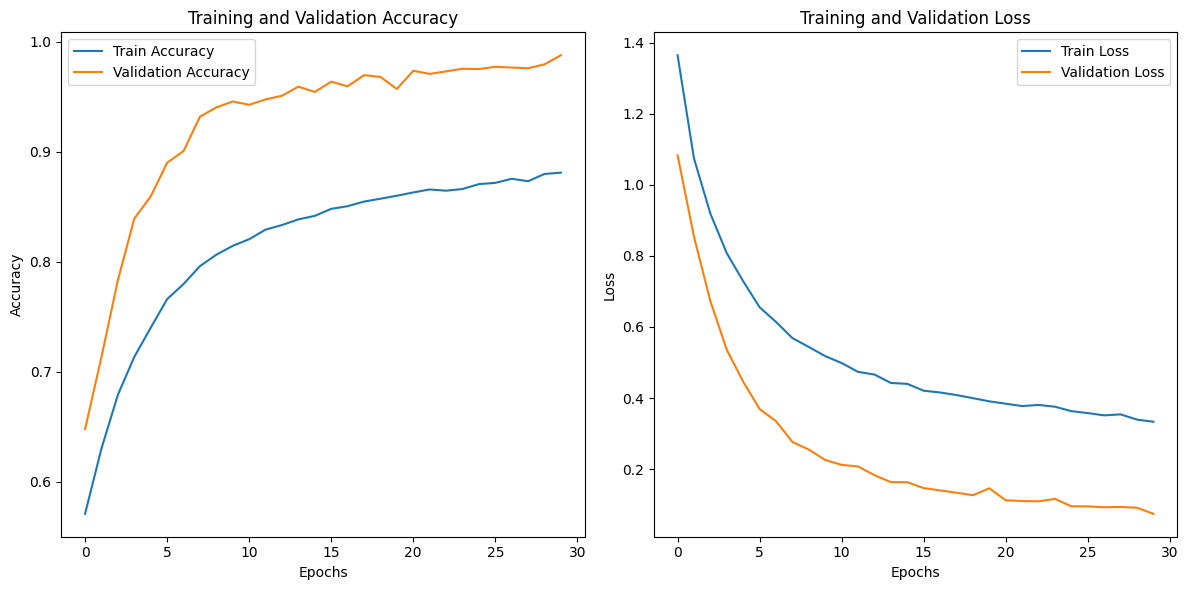

Test Accuracy: 0.9879
Test Loss: 0.0744


In [49]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

# Assuming `data` is your dataset and the preprocessing steps are done

# Step 1: Prepare the features and target variable
features = ['grid', 'points', 'fastestLap','laps', 'fastestLapTime_numeric',
            'fastestLapSpeed','round', 'lat','lng','alt','age', 'location',
            'country', 'year']

target = 'rank'  # Target column: rank of the driver in the race

# Select only the numeric features for CNN input
X = data[features].select_dtypes(include=[np.number])

# Handle missing values by filling with mean (common approach for CNN)
X = X.fillna(X.mean())

# Step 2: Normalize the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Prepare the target variable (rank) for classification
y = data[target]

# One-hot encode the target labels
y_encoded = to_categorical(y)

# Step 4: Split the data into training, testing, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

# Step 5: Build the CNN model
model = Sequential()

# Adding Conv1D layer - 1D convolution for temporal data (features in rows)
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))

# Add MaxPooling layer
model.add(MaxPooling1D(pool_size=2))

# Flatten the output to feed into a fully connected layer
model.add(Flatten())

# Add Dense layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout to prevent overfitting
model.add(Dense(64, activation='relu'))
model.add(Dense(y_encoded.shape[1], activation='softmax'))  # Output layer with softmax

# Step 6: Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 7: Train the model with early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=32, callbacks=[early_stop])

# Step 8: Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)

# Step 9: Predict using the trained model
y_pred = model.predict(X_test)



# Step 12: Plotting Accuracy and Loss over epochs
# Accuracy Plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Step 13: Output the test accuracy and loss
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")


## Confusion Matrix of CNN

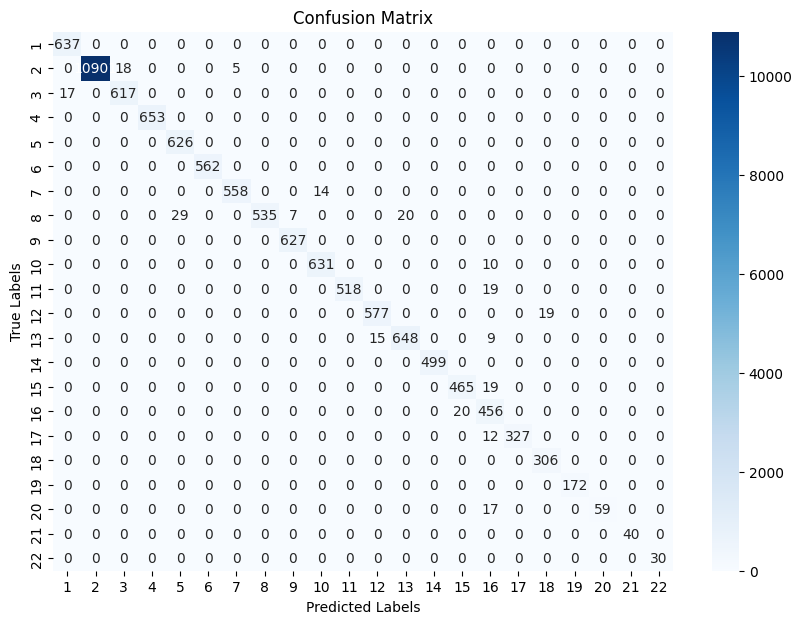

In [50]:
# Step 10: Convert predictions back to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Step 11: Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plotting the Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Function for Prediction

In [66]:
def predict_winner(input_data):
    # Step 1: Process the input data (scaling and reshaping)
    input_data = input_data[features]

    # Handle categorical features (e.g., 'country' and 'location') by one-hot encoding
    input_data = pd.get_dummies(input_data, columns=['country', 'location'], drop_first=True)

    # Ensure the columns are aligned with the training set
    missing_cols = set(X.columns) - set(input_data.columns)
    for col in missing_cols:
        input_data[col] = 0  # Add missing columns with 0 values
    input_data = input_data[X.columns]  # Reorder columns to match the training data order

    # Step 2: Handle missing values by filling with the mean (same as during training)
    input_data = input_data.fillna(input_data.mean())

    # Step 3: Normalize the data using the same scaler used in training
    input_data_scaled = scaler.transform(input_data)

    # Step 4: Reshape input for Dense layers, no need to reshape for Conv1D unless necessary
    input_data_scaled = input_data_scaled.reshape(1, -1)  # Reshape to (1, num_features)

    # Check the shape of the data after reshaping
    print(f"Input data shape after reshaping: {input_data_scaled.shape}")

    # Step 5: Make prediction
    predictions = model.predict(input_data_scaled)

    # Step 6: Decode the predictions to get the predicted class (rank)
    predicted_classes = np.argmax(predictions, axis=1)

    return predicted_classes





# Example input for prediction (ensure that the categorical columns are handled correctly)
test_input_data = pd.DataFrame({
    'grid': [1], 'points': [25], 'fastestLap': [1], 'laps': [58], 'fastestLapTime_numeric': [75],
    'fastestLapSpeed': [100], 'round': [2], 'lat': [51.5074], 'lng': [-0.1278], 'alt': [35],
    'age': [28], 'location': ['UK'], 'country': ['US'], 'year': [2024]
})

# Make prediction
predicted_rank = predict_winner(test_input_data)

# Output the predicted rank
print(f"Predicted rank: {predicted_rank}")



Input data shape after reshaping: (1, 12)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted rank: [2]
